## Titanic Survival Prediction 

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [157]:
df.shape

(418, 12)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


There are some missing values in 'age', 'fare' and 'cabin' columns 

In [159]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* 86 missing values in Age = 20.57 % <br />
* 78 % missing values of cabin 
* 1 missing value of fare which can be simply replaced by median value 

In [160]:
np.round(df.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,14.18,0.90,0.98,55.91
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,21.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,27.00,0.00,0.00,14.45
75%,1204.75,1.00,3.00,39.00,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


In [161]:
## cheaking duplicates 
df.duplicated().sum()

0

In [162]:
## cheaking the correlation of columns 
np.round(df.corr(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.02,-0.03,-0.03,0.00,0.04,0.01
Survived,-0.02,1.00,-0.11,-0.00,0.10,0.16,0.19
Pclass,-0.03,-0.11,1.00,-0.49,0.00,0.02,-0.58
Age,-0.03,-0.00,-0.49,1.00,-0.09,-0.06,0.34
SibSp,0.00,0.10,0.00,-0.09,1.00,0.31,0.17
Parch,0.04,0.16,0.02,-0.06,0.31,1.00,0.23
Fare,0.01,0.19,-0.58,0.34,0.17,0.23,1.00


*from above figures we can roughly result out some insights*
  * Fare column is inversely corrleated with Pclass column  (-58 %) 
      *
  * Fare column is positively corrleated with Age column   (+34 %)
  <br />
  * Age column is inversely corrleated with Pclass column (-49 %)
  * Age column is positively corrleated with Fare Column  (+34 %)
  

In [163]:
np.round(df.corr()["Age"]*100, 2)

PassengerId     -3.41
Survived        -0.00
Pclass         -49.21
Age            100.00
SibSp           -9.16
Parch           -6.12
Fare            33.79
Name: Age, dtype: float64

Age and Fare is highly corrleated almost 33 % <br />
that means if age is increasing the fare is also increasing <br />
also if age is Increasing then Pclass is decreasing i.e class 1 will be having older people 


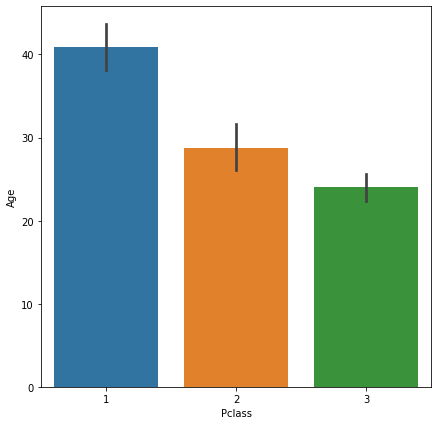

In [164]:
## we will cross verify this by plotting the graph between Pclass and Age
plt.figure(figsize=(7,7))
sns.barplot(df['Pclass'], df['Age'])
plt.show()

### EDA -- Univarient Analysis 


Columns = 'PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked'
<br />

***unnecessary columns :*** PassengerId, Name, Ticket
 
**1. Categorical columns :** Survived, Pclass,Sex, SibSp, Parch, Cabin, Embarked <br />
**2. Numerical columns :** Age, Fare(continius)

In [165]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [166]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [167]:
df['SibSp'].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [168]:
df['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [169]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### visualization

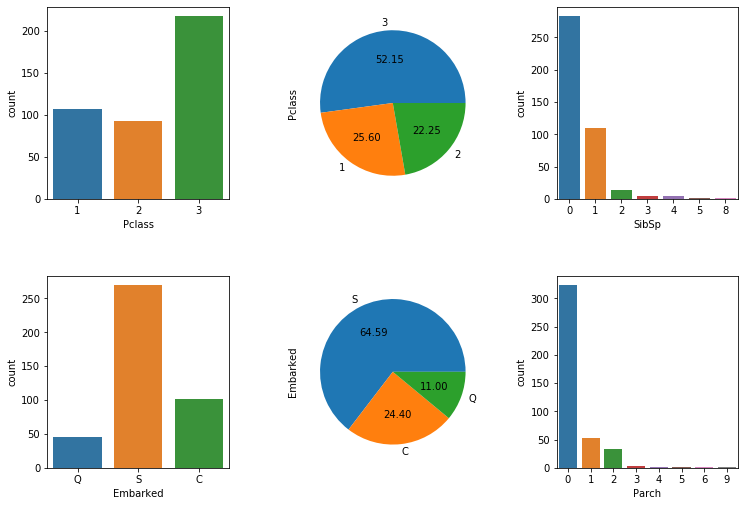

In [170]:
fig, axis = plt.subplots(2,3, figsize=(12, 8))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

sns.countplot(df['Pclass'], ax = axis[0,0])
df['Pclass'].value_counts().plot(kind = "pie", autopct = "%.2f", ax = axis[0,1])
sns.countplot(df['SibSp'], ax = axis[0,2])
sns.countplot(df['Embarked'], ax = axis[1,0])
df['Embarked'].value_counts().plot(kind = "pie", autopct = "%.2f", ax = axis[1,1])
sns.countplot(df['Parch'], ax = axis[1,2])
plt.show()


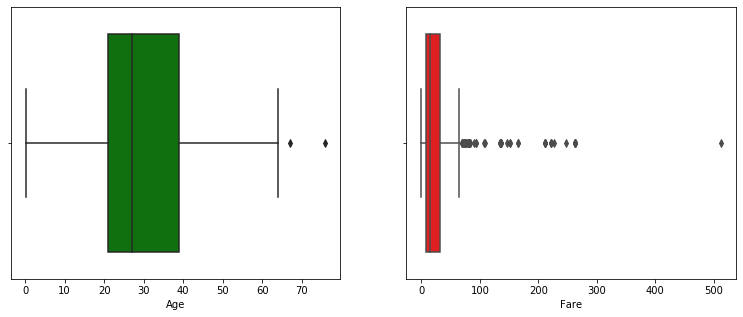

In [171]:
fig, axis = plt.subplots(1,2, figsize =(13,5) )

sns.boxplot(df['Age'], ax = axis[0], color = "green")
sns.boxplot(df["Fare"], ax = axis[1], color = "red")
plt.show()

In [172]:
# print(df["Age"].min(), df["Age"].max(), df["Age"].median())

* Fare $500 is potential outlier and some more
* **Age Feature** 
    * we can observe 2 outliers in Age columns
    * Age min value = 0.17
    * Age max value = 76

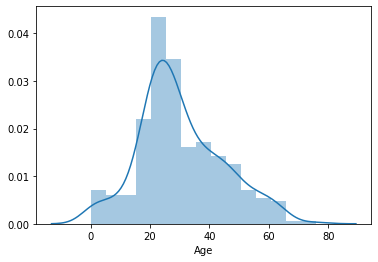

In [173]:
## Displot is same as histogram just added kde
## kde = Kernal density destribution 


## kde == Pdf (probablity density function )
## that means if i take random person of x age then it will give me the probablity of finding that person

sns.distplot(df["Age"])
plt.show()

## dis plot also tells the skewness of data

## skewness can also be find out by 
## df["Age"].skew()   ... if it is 1 then data is equally distributed

 ***Exploring Target Column 'Survived'***

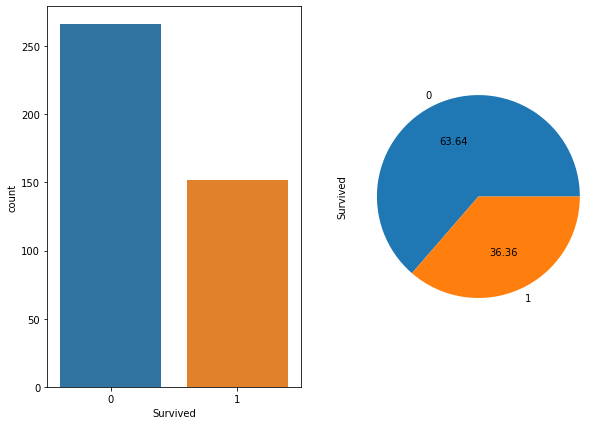

In [202]:
fig, axis = plt.subplots(1,2, figsize=(10,7))

sns.countplot(df["Survived"], ax = axis[0])
df['Survived'].value_counts().plot(kind = "pie", autopct ='%.2f', ax = axis[1])
plt.show()

--> looks like little imbalenced data

### Multivarient analysis

Numerical Columns = Age, ticket, Fare

In [175]:
## box plot 
## It gives the 5 No summery 

## median == if we sort our date then the middle element is median 
## Q1 = this is that form data, below which 25 % of data is small   i.e. 25 percentile 
## Q3 = 75 percentile 
## minimum 
## maximum 

## from this we can clearly see that 500 fare is potential outlier

### Dropping Un-necessary Columns

In [176]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [177]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [178]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [198]:
df.to_csv("Titanic_clean_data.csv", index = False)  ## saving this data

In [199]:
df1 = pd.read_csv("Titanic_clean_data.csv")
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


### Filling missing Values

1. Age column can be filled with medain value because age column is unbalenced so mean will not be good option 
2. Fare column with median, same reason 

In [179]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df["Fare"] = df["Fare"].fillna(df['Fare'].median())

In [180]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Feature Engineering

In [181]:
df['Sex'].replace(['female', 'male'], [0,1], inplace = True)

In [182]:
# label encoading
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)

In [183]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


### Spliting dataset into train and test 

In [184]:
from sklearn.model_selection import train_test_split

X  = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [185]:
print()

### Model building

In [186]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', min_samples_leaf=1, min_samples_split=16, n_estimators=700)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 1.0
Recall/Sensitivity: 1.0


In [187]:
rf_model.predict([[1, 0, 40.0, 1, 0, 93.5, 1]])[0]

C:\Users\shivam\anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [188]:
# Pclass	Sex	Age	SibSp	Parch	Fare	Embarked

# user_input = ["First", "Male",30, 0, 0, 200,"Southampton" ]

import numpy as np
p_class = "First"
sex = "Female"
age = 30
sib_sp = 0
parch = 0
fare = 300
embarked = "Southampton"

In [189]:
if sex == "Male":
    sex_val = 1
else:
    sex_val = 0

if p_class == "First":
    p_class_val = 1
elif p_class == "Second":
    p_class_val = 2
elif p_class == "Third":
    p_class_val = 3

dic = {
    'Southampton':0, 
    'Cherbourg'  :1, 
    'Queenstown' :2 }

embarked_val = dic[embarked]

# order of our model's features is [Pclass	Sex	Age	SibSp	Parch	Fare	Embarked]
X = np.array([ [p_class_val, sex_val, age, sib_sp, parch, fare, embarked_val] ])


print(X)

result = rf_model.predict(X)[0]
print(result)
if result == 1:
    print("Survived")
else:
    print("Not Survived")


[[  1   0  30   0   0 300   0]]
1
Survived


C:\Users\shivam\anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### Saving model 

In [190]:
import pickle

In [191]:
data = {"model":rf_model}
with open("rf_titanic_model.pkl", 'wb') as file:
    data = pickle.dump(data, file)


In [192]:
file = open('random_forest_titanic_model.pkl', 'wb')
# dump information to that file
pickle.dump(rf_model, file)

In [193]:
distriburtion of data into features 


SyntaxError: invalid syntax (<ipython-input-193-64c998fe51a5>, line 1)